In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img_gray = cv2.imread("/content/drive/MyDrive/Images/4/Barbara.bmp", 0)

In [8]:
def apply_filter(image, filter_type, T):
  R, C = image.shape
  R_padded = 2 * R
  C_padded = 2 * C

  left_value_row = int(T * R_padded)
  right_value_row = int((1 - T) * R_padded)
  left_value_column = int(T * C_padded)
  right_value_column = int((1 - T) * C_padded)
  
  image_padded = np.zeros((R_padded, C_padded))
  image_padded[0:R, 0:C] = image

  image_DFT = np.fft.fft2(image_padded)

  image_shift = np.fft.fftshift(image_DFT)

  image_filtered = image_shift.copy()

  if filter_type == "a":
    image_filtered[left_value_row:right_value_row, left_value_column:right_value_column]=0
  else:
    image_filtered[0:left_value_row, :]=0
    image_filtered[:, right_value_column:C_padded]=0
    image_filtered[right_value_row:R_padded, :]=0
    image_filtered[:, 0:left_value_column]=0

  image_filtered_inverse_shift = np.fft.ifftshift(image_filtered)

  image_filtered_IDFT = np.fft.ifft2(image_filtered_inverse_shift)

  image_filtered_real = image_filtered_IDFT.real

  image_filtered_result = image_filtered_real[0:R, 0:C]

  return image_filtered_result

Text(0.5, 1.0, 'Image: Filter b - T = 1/8')

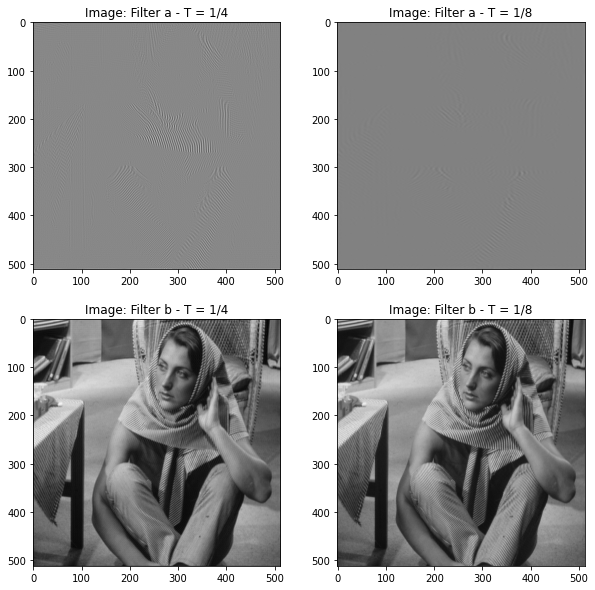

In [9]:
filter_a_1_4 = apply_filter(img_gray, "a", 1/4)
filter_a_1_8 = apply_filter(img_gray, "a", 1/8)
filter_b_1_4 = apply_filter(img_gray, "b", 1/4)
filter_b_1_8 = apply_filter(img_gray, "b", 1/8)

fig, plot = plt.subplots(2, 2, figsize = (10, 10))

plot[0][0].imshow(filter_a_1_4, cmap='gray')
plot[0][0].set_title("Image: Filter a - T = 1/4")

plot[0][1].imshow(filter_a_1_8, cmap='gray')
plot[0][1].set_title("Image: Filter a - T = 1/8")

plot[1][0].imshow(filter_b_1_4, cmap='gray')
plot[1][0].set_title("Image: Filter b - T = 1/4")

plot[1][1].imshow(filter_b_1_8, cmap='gray')
plot[1][1].set_title("Image: Filter b - T = 1/8")